In [3]:
import numpy as np
from scipy import io, integrate, linalg, signal
from scipy.sparse.linalg import cg, eigs
import matplotlib as mpl
import matplotlib.pyplot as plt

# Capítulo 5

## Exemplo 5.1

In [4]:
A = np.array([[-7, 0, 2], [7, -8, 0], [0, 8, -8]])
B = np.array([-50, -1, 0])
C = linalg.solve(A, B)
print(C)

[9.57142857 8.5        8.5       ]


## Exemplo 5.2

In [5]:
A = np.array([[-250, 0, 40], [240, -250, 0], [0, 240, -250]])
B = np.array([-6500, -2500, -2500])
# T = linalg.solve(A, B)
T = linalg.inv(A) @ B
print(T)

[34.17536221 42.80834772 51.09601381]


## Newton-Rhapson para Sistemas de Equações Não Lineares

In [6]:
def newton_rhapson(f, x_est, df = None, i_max = 20, dx = 1e-6):
    x = [list(x_est)]
    for i in range(i_max):
        X = np.array(x[i])
        if df is None:
            dF = np.array(diff(f, x[i], dx))
        else:
            dF = np.array(df(X))
        F = np.array(f(X))
        X = X - linalg.inv(dF) @ F
        x.append(list(X))
    return x

## Diferenciação Numérica

In [7]:
def diff(f, x, dx = 1e-6):
    df = list()
    x_orig = x.copy()
    for i in range(len(x_orig)):
        x[i] += dx
        df.append((np.array(f(x)) - np.array(f(x_orig))) / dx)
        x = x_orig.copy()
    df = np.array(df).transpose()
    df = [list(i) for i in df]
    return df

## Exemplo da Seção 5.2.1

In [8]:
def f(x):
    Ca = x[0]
    Cb = x[1]
    u = Ca + 0.06*Ca*Cb - 200
    v = Cb + 0.06*Ca*Cb - 200
    return [u, v]

def df(x):
    Ca = x[0]
    Cb = x[1]
    du_dCa = 1 + 0.06*Cb
    du_dCb = 0.06 * Ca
    dv_dCa = 0.06 * Cb
    dv_dCb = 1 + 0.06*Ca
    return [[du_dCa, du_dCb], [dv_dCa, dv_dCb]]

In [9]:
C = newton_rhapson(f, [200, 200], df, i_max = 6)
for i, v in enumerate(C):
    print(i, v)

0 [200, 200]
1 [103.99999999999977, 104.0]
2 [62.979228486646804, 62.97922848664683]
3 [51.18114093652843, 51.18114093652841]
4 [50.011720627032815, 50.01172062703282]
5 [50.00000117724716, 50.000001177247164]
6 [50.000000000000014, 50.00000000000002]


In [10]:
a = df([200, 200])
print(a)
b = diff(f, [200, 200], 1e-4)
print(b)

[[13.0, 12.0], [12.0, 13.0]]
[[12.99999999901047, 12.000000001535227], [11.999999996987754, 13.000000003557943]]


### Problema Proposto 5.1

In [11]:
A = np.array([[0.50, 0.33, 0], [0.50, 0.33, 0.70], [0, 0.34, 0.30]])
print(A)

[[0.5  0.33 0.  ]
 [0.5  0.33 0.7 ]
 [0.   0.34 0.3 ]]


In [12]:
B = np.array([0.30, 0.40, 0.30]) * 100
print(B)

[30. 40. 30.]


In [13]:
F = linalg.inv(A) @ B
print(F)
print(sum(F))

[10.08403361 75.6302521  14.28571429]
100.0


### Problema Proposto 5.2

In [14]:
Qin, Q32, Q43 = 10, 5, 3
V1, V2, V3, V4 = 25, 75, 100, 25
k1, k2, k3, k4 = 0.075, 0.15, 0.4, 0.1
Cain = 1

In [15]:
A = np.array([
    [-1, 0, 0, 0],
    [1, -1, 0, 0],
    [0, 1, -1, 0],
    [0, 0, 1, -1]
])
print(A)

[[-1  0  0  0]
 [ 1 -1  0  0]
 [ 0  1 -1  0]
 [ 0  0  1 -1]]


In [16]:
B = np.array([-Qin, -Q32, -Q43+Q32, Q43])
print(B)

[-10  -5   2   3]


In [17]:
Q = linalg.inv(A) @ B
print(Q)
Q12, Q23, Q34, Qout = Q

[10. 15. 13. 10.]


In [18]:
A = np.array([
    [-Q12-k1*V1, 0, 0, 0],
    [Q12, -Q23-k2*V2, Q32, 0],
    [0, Q23, -Q34-Q32-k3*V3, Q43],
    [0, 0, Q34, -Qout-Q43-k4*V4]
])
print(A)

[[-11.875   0.      0.      0.   ]
 [ 10.    -26.25    5.      0.   ]
 [  0.     15.    -58.      3.   ]
 [  0.      0.     13.    -15.5  ]]


In [19]:
B = np.array([-Qin*Cain, 0, 0, 0])
print(B)

[-10   0   0   0]


In [20]:
C = linalg.inv(A) @ B
print(C)

[0.84210526 0.33821858 0.091437   0.0766891 ]


### Problema Proposto 5.3

In [21]:
def f(x):
    Ca, Cb, Cc, Cd = x
    Cain, Cbin, Ccin, Cdin = 0.7, 0.4, 0, 0
    F = 5 / 60
    k = 0.855
    V = 40
    ua = F*(Cain - Ca) - k*Ca*Cb*V
    ub = F*(Cbin - Cb) - k*Ca*Cb*V
    uc = F*(Ccin - Cc) + k*Ca*Cb*V
    ud = F*(Cdin - Cd) + k*Ca*Cb*V
    return [ua, ub, uc, ud]

In [22]:
def df(x):
    Ca, Cb, Cc, Cd = x
    # Cain, Cbin, Ccin, Cdin = 0.7, 0.4, 0, 0
    F = 5 / 60
    k = 0.855
    V = 40
    dua_dCa = -F - k*Cb*V
    dua_dCb = -k*Ca*V
    dua_dCc = 0
    dua_dCd = 0
    dub_dCa = -k*Cb*V
    dub_dCb = -F - k*Ca*V
    dub_dCc = 0
    dub_dCd = 0
    duc_dCa = k*Cb*V
    duc_dCb = k*Ca*V
    duc_dCc = -F
    duc_dCd = 0
    dud_dCa = k*Cb*V
    dud_dCb = k*Ca*V
    dud_dCc = 0
    dud_dCd = -F
    return [
        [dua_dCa, dua_dCb, dua_dCc, dua_dCd],
        [dub_dCa, dub_dCb, dub_dCc, dub_dCd],
        [duc_dCa, duc_dCb, duc_dCc, duc_dCd],
        [dud_dCa, dud_dCb, dud_dCc, dud_dCd]
    ]

In [23]:
x = [0.7, 0.4, 0, 0]
a = df(x)
print(a)
b = diff(f, x, 1e-4)
print(b)

[[-13.763333333333335, -23.939999999999998, 0, 0], [-13.680000000000001, -24.02333333333333, 0, 0], [13.680000000000001, 23.939999999999998, -0.08333333333333333, 0], [13.680000000000001, 23.939999999999998, 0, -0.08333333333333333]]
[[-13.76333333334756, -23.940000000006734, 0.0, 0.0], [-13.68000000001146, -24.023333333342833, 0.0, 0.0], [13.68000000001146, 23.940000000006734, -0.08333333333609971, 0.0], [13.68000000001146, 23.940000000006734, 0.0, -0.08333333333609971]]


In [24]:
C = newton_rhapson(f, [0.7, 0.4, 0, 0], i_max = 10)
for i, v in enumerate(C):
    print(i, v)
print(sum(C[0]) - sum(C[-1]))

0 [0.700001, 0.4, 0, 0]
1 [0.44601815144756035, 0.14601715144754623, 0.253982848552468, 0.2539828485524609]
2 [0.3375060578719658, 0.03750505787196501, 0.3624949421280341, 0.36249494154977135]
3 [0.3063099380446022, 0.006308938023820709, 0.3936910619553986, 0.39369106195539816]
4 [0.3032209555749126, 0.0032199555749126505, 0.39678004442508735, 0.39678004442508735]
5 [0.3031900635814098, 0.0031890635814099183, 0.3968109364185901, 0.3968109364185901]
6 [0.30319006049115854, 0.0031890604911586143, 0.3968109395088414, 0.3968109395088414]
7 [0.3031900604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
8 [0.3031900604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
9 [0.3031900604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
10 [0.3031890604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
9.999999999177334e-07


# Capítulo 6

Método de Euler

In [25]:
# WIP
def euler(f, IC, int, N=1000):
    x = np.linspace(*int, N + 1)
    h = x[1] - x[0]
    y = np.array(IC.copy())
    y_out = list()
    for i in range(len(x)):
        y_out.append(y)
        k1 = h * np.array(f(x[i], y))
        y = y + k1
    
    return x, np.array(y_out).transpose()

In [26]:
def f(x, y):
    t = x
    V = y[0]
    T = y[1]
    Q = 0.5
    Qin = 2 * Q
    Qout1 = Q
    Qout2 = Q # 0
    Tin = 273.15 + 30
    dV = Qin - (Qout1 + Qout2)
    dT = (1 / V) * (Qin*Tin - (Qout1*T + Qout2*T) - T*dV)
    return [dV, dT]

In [27]:
x, y = euler(f, [10, 20+273.15], (0, 60), 5000)

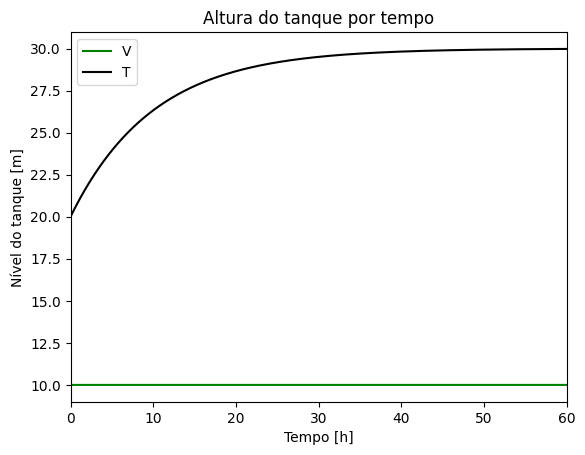

<Figure size 640x480 with 0 Axes>

In [29]:
fig, ax = plt.subplots()
ax.plot(x, y[0], label='V', c='g')
ax.plot(x, y[1]-273.15, label='T', c='k')
ax.set_xlabel('Tempo [h]')
ax.set_ylabel('Nível do tanque [m]')
ax.set_title('Altura do tanque por tempo')
ax.set_xlim((0, 60))
ax.legend()
plt.show()
plt.savefig('fig.pdf')